<a href="https://colab.research.google.com/github/shahsawarjan006/Digit-recognition-/blob/main/Machine%20learning%20digit%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Digit Recognition Assesment
## Machine learning and Computer Vision
### Shah Sawar Jan c3085681


#Introduction
This project is digit recognition done using random forest technique.The model is trained on mnist dataset in other file to save compilation time. There are total 16 images and 1 video. below is the description of code.

#section

Joblib is python library used to load and save the python file or objects from the disk.

In [ ]:
!pip install joblib

Required Libraries

In [ ]:
#os library helps in reading and writing the file
import os
#numpy provides support for multi-dimensional array, matricss and mathematical funtions
import numpy as np
#cv2 is a computer vision library used for detection of objects , image processing and video analyis
import cv2
# This library provides ensemble learning methods we used RandomFoest algorithm
from sklearn.ensemble import RandomForestClassifier
#pandas is library used for data manipulation and anlysis
import pandas as pd
# pyplot library is used in creating line plots, histogram etc
import matplotlib.pyplot as plt
# imread_collection function gives the collection of image from a specific directory
from skimage.io import imread_collection
# this library work as a feature extration like edge detection and corner detection
from skimage import feature
# this is used to show the images like imshow function
from google.colab.patches import cv2_imshow
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.shape

(70000, 784)

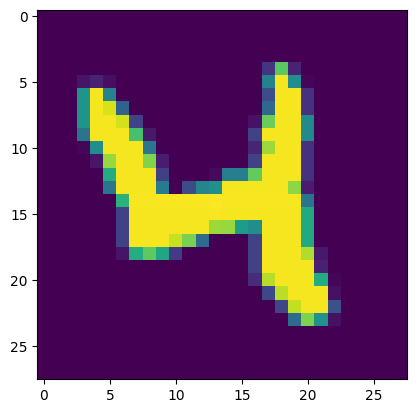

In [ ]:
X_reshaped = np.reshape(X[20], (28, 28))

plt.imshow(X_reshaped)

In [ ]:
#1 Features Extraction  , HOG , any other algorithm, Hog extract feature from all the images
#2 Fitting the model with edited training data we have

X_reshaped2 = [np.reshape(x_i, (28, 28)) for x_i in X ]
X_hog = [feature.hog(x_i) for x_i in X_reshaped2]
#train test split will  be used to split the data into training and testing modules. we specify the text_size to be 0.01 and pass X_hog and y as inputs which will be splitted
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.01, random_state=42)


We use random forest model. works in a way by building multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. we initilize 250 decison trees in this case as n_estimators=250

In [ ]:
#sets the random state to 62 for reproducibility
random_forest_classifier = RandomForestClassifier(n_estimators=250, random_state=62)

# Train the Random Forest classifier
random_forest_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = random_forest_classifier.score(X_test, y_test)
print(f'accuracy of test data is: {test_accuracy}')


accuracy of test data is: 0.9528571428571428


img_coll[:10] selects the first 10 images and applies histogram feature on it.

In [ ]:
#The load_All_images loads all the images from the directory.
load_All_images = '/content/drive/MyDrive/Number_Test_Data/*.png'
#The imread_collection function is  used to read the collection of images.
img_coll = imread_collection(load_All_images)
# computes the hog feature for all the images
images_HOG_coll =[ feature.hog(im) for im in img_coll[:10] ]


The arry_visual is used for visualizations of the HOG feature and arry_hog_vec will contain all the feature vectors for each image. The parameter which is visualize=true will compute the visualization on hog feature.

In [ ]:
arry_visual= []
arry_hog_vec = []
for i in range(10):
 images_HOG_Vec , image_HO_vis = feature.hog(img_coll[i], visualize=True)
 arry_visual.append(image_HO_vis)
 arry_hog_vec.append(images_HOG_Vec)


This code is to plot the visalized feature image 5.

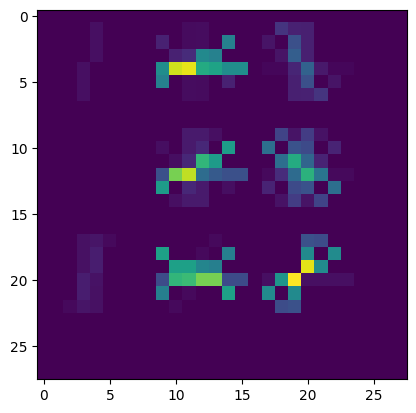

In [ ]:
plt.imshow(arry_visual[5])

this function is used to convert to grayscale with if and else. This will check if there is a 3 dimensional array, then it will extract the first channel which is (im[:,:,0]) and select only the values ​​of that channel. This will convert the image to grayscale. Otherwise if there is no image in 3 dimensional that would mean it is already in grayscale.

In [ ]:
images_collX = [im[:,:,0] if len(im.shape) == 3 else im for im in img_coll]


This loop will plot the images

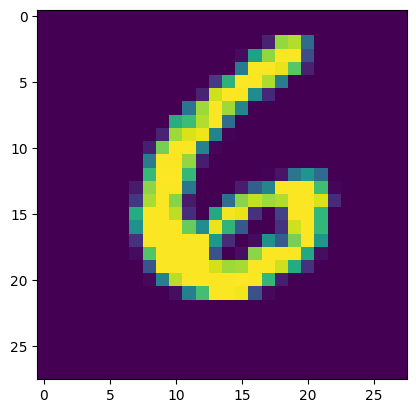

In [ ]:
for i in range(10):

  plt.imshow(images_collX[i])

This function loads and trains functions from the directory. It uses a trained classifier drawn from a random forest of training models. This is useful for running the model only once and saving it in pkl format.
randomf_classifier is used to predict images for which HOG features are calculated and stored in images_HOG_coll. Prediction is then called with "images_Hog_col" as input.

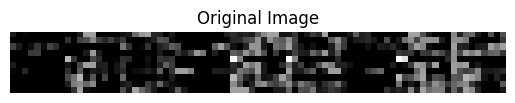

Predicted Digits: ['5' '3' '4' '3' '1' '3' '4' '1' '9' '6']


In [ ]:

# Predict the digit
predicted_digit = random_forest_classifier.predict(images_HOG_coll)

# Show the original image
plt.imshow(images_HOG_coll, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

# Show the prediction
print(f"Predicted Digits: {predicted_digit}")

This is to show all the predicted images from colX variable and plot with figsize 10 inches and 7 in width

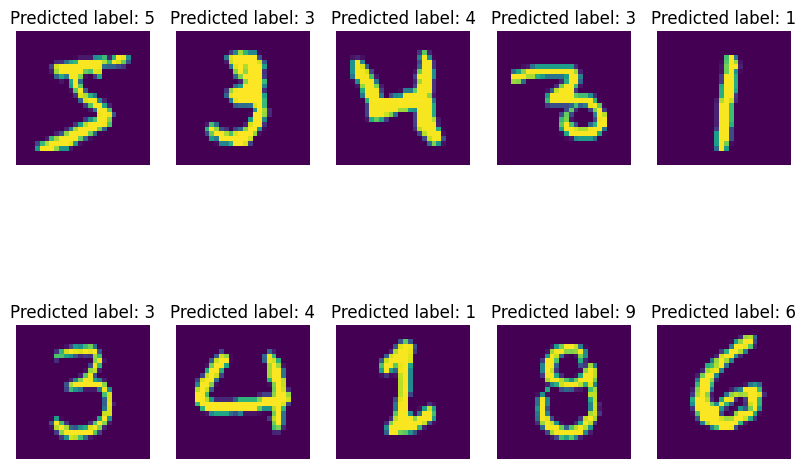

In [ ]:
fig = plt.figure(figsize=(10, 7))
#loop to show the all 10 images
for i in range(10):
  fig.add_subplot(2, 5, i+1)
  plt.imshow(images_collX[i])
  plt.axis('off')
  # These labels are generated by the model that we predicted using random forest
  plt.title('Predicted label: {}'.format(predicted_digit[i]))

##subsection
###Image 11

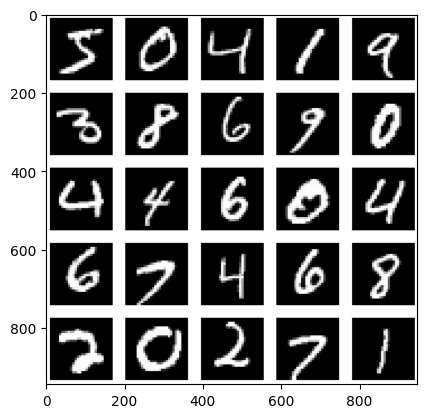

In [ ]:
#displaying the iamge 11 using plt
plt.imshow(images_collX[10],cmap='gray')

In [ ]:
#check the shape of the 11th image so we can preprocess it according to the training model
img_coll[10].shape

(944, 948, 4)

In [ ]:
#we create a copy of the image to not affect the original image, select all rows and colums and the first three channel which represent RGB
image10 = img_coll[10][:,:,0:3].copy()

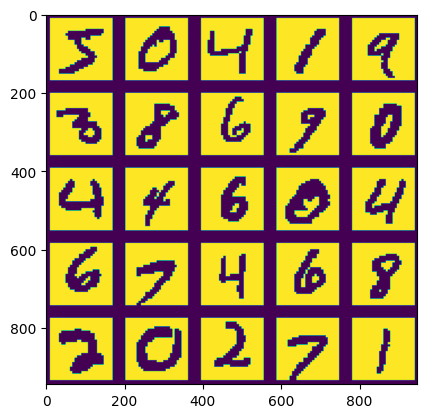

In [ ]:
#lower treshhold set to white in RGB format
thre_white_low = (0,0,0)
#upper threshold set to higher for viewing the numbers
thre_white_high = (25,25,25)
# This will create binary mask, threshold stored in image10
X11_white = cv2.inRange(image10,thre_white_low, thre_white_high)
plt.imshow(X11_white)


In [ ]:
#X11_white represent the binary mask image
#cv2.RETR_EXTERNAL parameter give the information about the contour retrieval mode.
#cv2.CHAIN_APPROX_SIMPLE tells about the contour approximation method
contours,_ = cv2.findContours(X11_white, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
img_with_rectangles = image10.copy()
#create a list to append images cropped region
x10_imgs = []
c_num = 0  # initialize contour number
for cn in contours:
  # Get the bounding box coordinates
    rx, ry, rw, rh = cv2.boundingRect(cn)
     # Draw rectangle
    cv2.rectangle(img_with_rectangles, (rx, ry), (rx + rw, ry + rh), (0, 0, 255), 8)
    #print((rx, ry, rw, rh))
    #print('\n')
    roi = image10[ry:ry+rh, rx:rx+rw].copy()
    x10_imgs.append(roi)
# Visualize the image with rectangles

#plt.imshow(cv2.cvtColor(img_with_rectangles, cv2.COLOR_BGR2RGB)) no need
plt.imshow(roi)
plt.axis('off')

plot all the images where all the images are

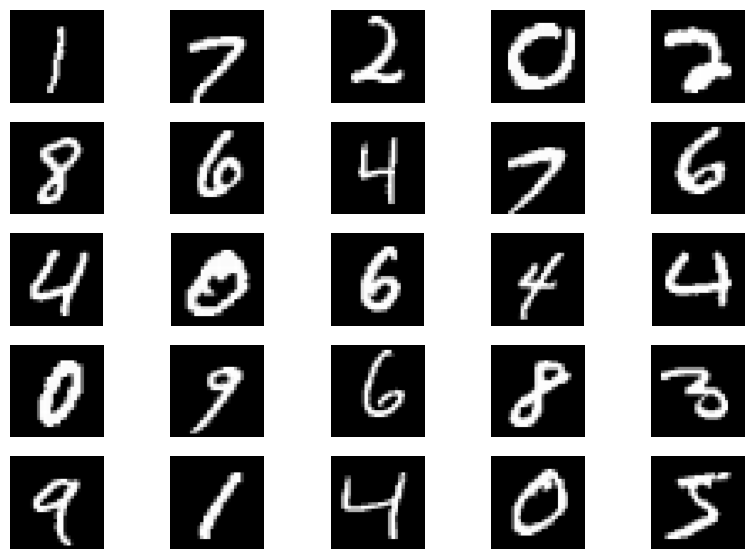

In [ ]:
fig = plt.figure(figsize=(10, 7))
for i in range(25):
  fig.add_subplot(5, 5, i+1)
  plt.imshow(x10_imgs[i])
  plt.axis('off')


This will do the preprocessing and resize the image to 28,28 format

In [ ]:
resized_images = []
for image in x10_imgs:
  resizedImage = cv2.resize(image , (28,28))
  resized_images.append(resizedImage)



In [ ]:
X11_gray = [cv2.cvtColor(x101,cv2.COLOR_BGR2GRAY) for x101 in resized_images] # Initializes a list called to store grayscale versions, .COLOR_BGR2GRAY parameter specifies the conversion from BGR to grayscale color space


In [ ]:
X11_gray[2].shape # checking the shape

(28, 28)

In [ ]:
resized_images[5].shape #resizing the shape

(28, 28, 3)

In [ ]:
images_HOG_coll_contours =[ feature.hog(im) for im in X11_gray ] # applying hog feature for feature extraction


In [ ]:
predicted_digit = random_forest_classifier.predict(images_HOG_coll_contours) #prediction


Showing the prediction label using predicted_digit

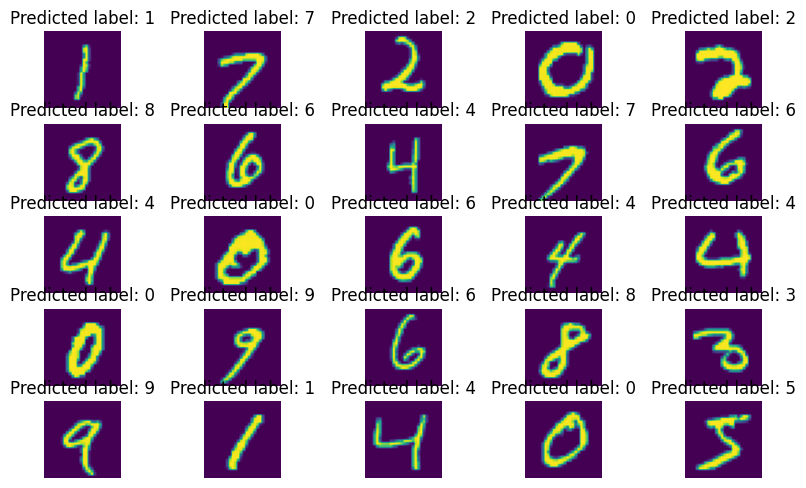

In [ ]:
fig = plt.figure(figsize=(10, 7))
for i in range(len(X11_gray)):
  fig.add_subplot(6, 5, i+1)
  plt.imshow(X11_gray[i])
  plt.axis('off')
  # These labels are generated by the model that we predicted using random forest
  plt.title('Predicted label: {}'.format(predicted_digit[i]))

##subsection

##Image 12

In this section the images are predicted on the experimented on the pattern as image 11.

(239, 392, 3)


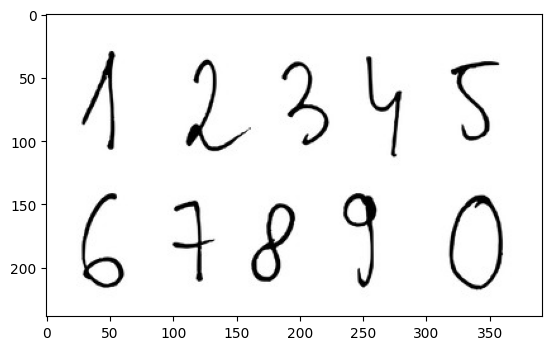

In [ ]:
imgx11=img_coll[11]
print(imgx11.shape)
plt.imshow(imgx11)

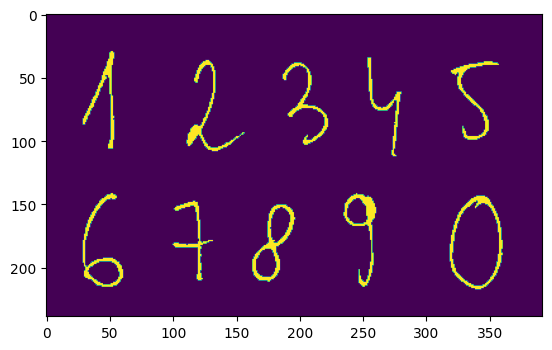

In [ ]:
thre_white_low = (0,0,0)
# set the threshold to 50,50,50
thre_white_high = (50,50,50)
X11_white = cv2.inRange(imgx11,thre_white_low, thre_white_high)

plt.imshow(X11_white)


In [ ]:
contours,_ = cv2.findContours(X11_white, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

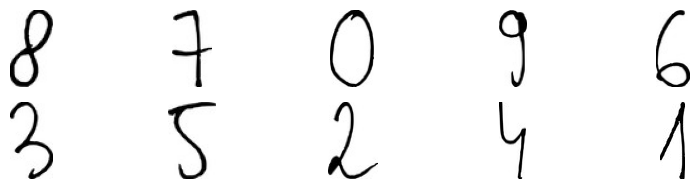

In [ ]:
img_with_rectangles = imgx11.copy()
x11_imgs = []

for cn in contours:
    rx, ry, rw, rh = cv2.boundingRect(cn)  # Get the bounding box coordinates
    cv2.rectangle(img_with_rectangles, (rx, ry), (rx + rw, ry + rh), (0, 0, 255), 8)  # Draw rectangle
    #print((rx, ry, rw, rh))
    #print('\n')

    roi = imgx11[ry:ry+rh, rx:rx+rw].copy()
    x11_imgs.append(roi)
# Visualize the image with rectangles

#plt.imshow(cv2.cvtColor(img_with_rectangles, cv2.COLOR_BGR2RGB))
fig = plt.figure(figsize=(10, 7))
for i in range(len(x11_imgs)):
  fig.add_subplot(6, 5, i+1)
  plt.imshow(x11_imgs[i])
  plt.axis('off')
  # These labels are generated by the model that we predicted using random forest
  # plt.title(': {}'.format())

In [ ]:
x11_imgs[2].shape

(74, 42, 3)

In [ ]:
resized_images = []


for image in x11_imgs:
  resizedImage = cv2.resize(image , (28,28))
  resized_images.append(resizedImage)


X11_gray = [cv2.cvtColor(i,cv2.COLOR_BGR2GRAY) for i in resized_images]
x_11_images_HOG =[ feature.hog(im) for im in X11_gray ]


In [ ]:
pred = random_forest_classifier.predict(x_11_images_HOG)

In [ ]:
pred

array(['6', '4', '9', '2', '8', '3', '3', '7', '0', '5'], dtype=object)

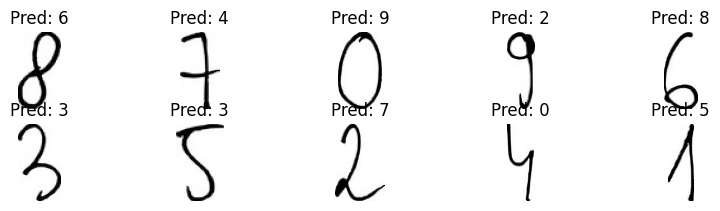

In [ ]:
fig = plt.figure(figsize=(10, 7))

for i in range(len(x11_imgs)):
  fig.add_subplot(6, 5, i+1)
  plt.imshow(x11_imgs[i])
  plt.axis('off')
  # These labels are generated by the model that we predicted using random forest
  plt.title('Pred: {}'.format(pred[i]))